<a href="https://colab.research.google.com/github/lassmed/DeepLearning2/blob/main/Tp2DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Création du dataset
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)



In [ ]:
print("Dimensions des entrées (X):", X.shape)
print("Dimensions de la sortie (y):", y.shape)

Dimensions des entrées (X): (1000, 2)
Dimensions de la sortie (y): (1000,)


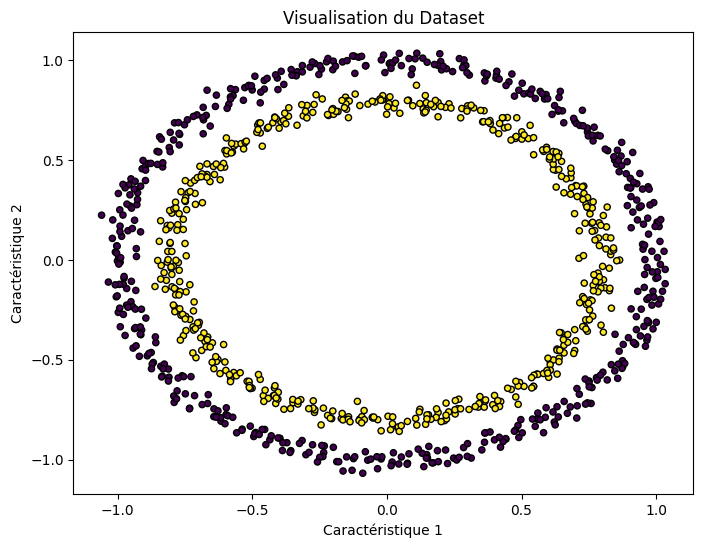

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.title('Visualisation du Dataset')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille de l'ensemble d'entraînement:", X_train.shape[0])
print("Taille de l'ensemble de test:", X_test.shape[0])


Taille de l'ensemble d'entraînement: 800
Taille de l'ensemble de test: 200


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(50, input_dim=50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                150       
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dense_22 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2751 (10.75 KB)
Trainable params: 2751 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=99, batch_size=10, validation_split=0.2)

Epoch 1/99
64/64 [==============================] - 1s 6ms/step - loss: 0.6907 - accuracy: 0.5063 - val_loss: 0.6911 - val_accuracy: 0.4938
Epoch 2/99
64/64 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5063 - val_loss: 0.6906 - val_accuracy: 0.4875
Epoch 3/99
64/64 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5094 - val_loss: 0.6901 - val_accuracy: 0.4938
Epoch 4/99
64/64 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5094 - val_loss: 0.6896 - val_accuracy: 0.5063
Epoch 5/99
64/64 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5141 - val_loss: 0.6892 - val_accuracy: 0.4938
Epoch 6/99
64/64 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5188 - val_loss: 0.6887 - val_accuracy: 0.4938
Epoch 7/99
64/64 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5266 - val_loss: 0.6882 - val_accuracy: 0.5000
Epoch 8/99
64/64 [==

313/313 [==============================] - 1s 2ms/step


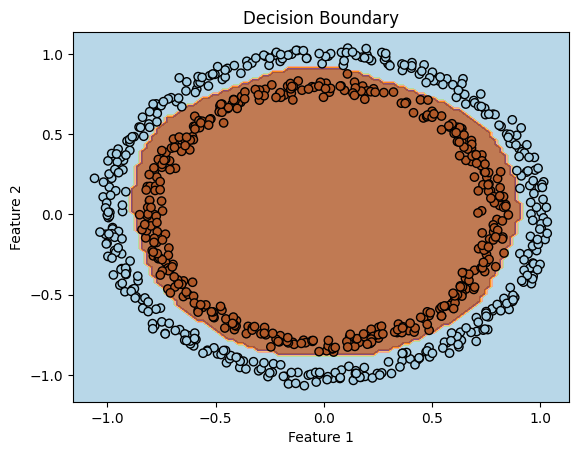

In [ ]:
# Function to plot decision boundaries
def plot_decision_boundary(model, X, y):
    # Determine the limits of the plot
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict the probabilities for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Threshold the probabilities to get the predicted classes
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

plot_decision_boundary(model, X_train, y_train)


In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Paramètres
n_samples = 1000
n_classes = 4
n_features = 2

# Création du dataset
X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, random_state=42)

# Division des données en ensembles d’apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


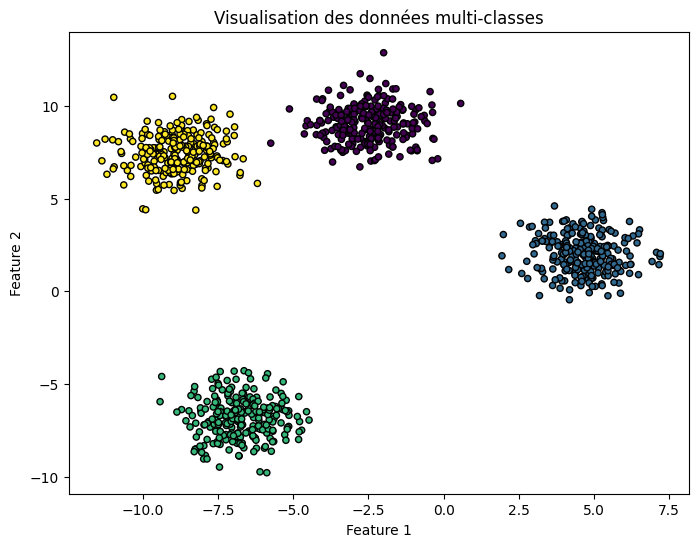

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.title('Visualisation des données multi-classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_ = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(32, input_dim=50, activation='relu'))
model.add(Dense(4, activation='softmax'))


model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                192       
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 4)                 132       
                                                                 
Total params: 2404 (9.39 KB)
Trainable params: 2404 (9.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import to_categorical


y_train_categorical = to_categorical(y_train, num_classes=4)
y_test_categorical = to_categorical(y_test, num_classes=4)

In [ ]:

model_multi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

In [ ]:
from keras.callbacks import LambdaCallback


print_progress = LambdaCallback(on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}, Val Loss = {logs['val_loss']:.4f}, Val Accuracy = {logs['val_accuracy']:.4f}") if epoch % 10 == 9 else None)


history = model_multi.fit(X_train, y_train_categorical, validation_data=(X_test, y_test_categorical), epochs=100, batch_size=32, callbacks=[print_progress])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


y_pred = model_multi.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


In [ ]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)


    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.show()


plot_decision_boundary(X_train, y_train, model_multi)


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Définition des nombres d'instances
n_samples_list = [10000, 15000, 20000, 25000]
accuracies = []

for n_samples in n_samples_list:
    # Génération du dataset
    X, y = make_blobs(n_samples=n_samples, centers=4, n_features=2, random_state=42)
    y_categorical = to_categorical(y, num_classes=4)

    # Division des données
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

    # Définition du modèle (la même architecture pour chaque dataset)
    model_multi = Sequential([
        Dense(64, activation='relu', input_shape=(2,)),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model_multi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entraînement du modèle
    history = model_multi.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

    # Enregistrement de l'accuracy de test après 100 époques
    final_accuracy = history.history['val_accuracy'][-1]
    accuracies.append(final_accuracy)

    print(f"Entraînement terminé pour {n_samples} instances avec une accuracy de test de {final_accuracy:.4f}")

# Tracé de la courbe de l'accuracy en fonction du nombre d'instances
plt.figure(figsize=(10, 6))
plt.plot(n_samples_list, accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy en fonction du nombre d'instances dans le dataset")
plt.xlabel("Nombre d'instances")
plt.ylabel("Accuracy de test")
plt.grid(True)
plt.show()
